# Explore Bike Share Data

In [28]:
library(ggplot2)
library(lubridate)# Get day of week with `wday` function

In [29]:
ny = read.csv('new_york_city.csv')
wash = read.csv('washington.csv')
chi = read.csv('chicago.csv')

In [30]:
head(ny)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986


In [31]:
str(ny)

'data.frame':	54770 obs. of  9 variables:
 $ X            : int  5688089 4096714 2173887 3945638 6208972 1285652 1675753 1692245 2271331 1558339 ...
 $ Start.Time   : Factor w/ 54568 levels "2017-01-01 00:17:01",..: 45448 32799 17316 31589 49688 10220 13390 13509 18111 12449 ...
 $ End.Time     : Factor w/ 54562 levels "201","2017-01-01 00:30:56",..: 45432 32783 17295 31567 49668 10204 13364 13505 18092 12422 ...
 $ Trip.Duration: int  795 692 1325 703 329 998 478 4038 5132 309 ...
 $ Start.Station: Factor w/ 636 levels "","1 Ave & E 16 St",..: 522 406 10 93 5 521 325 309 151 245 ...
 $ End.Station  : Factor w/ 638 levels "","1 Ave & E 16 St",..: 613 8 362 558 269 107 389 110 151 243 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 3 2 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 3 3 2 3 3 3 3 1 3 ...
 $ Birth.Year   : num  1998 1981 1987 1986 1992 ...


In [32]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber


In [33]:
str(wash)

'data.frame':	89051 obs. of  7 variables:
 $ X            : int  1621326 482740 1330037 665458 1481135 1148202 1594275 1601832 574182 327058 ...
 $ Start.Time   : Factor w/ 81223 levels "","2017-01-01 00:11:00",..: 74753 19510 59964 26708 67716 50891 73381 73775 23142 13333 ...
 $ End.Time     : Factor w/ 81217 levels "","2017-01-01 00:14:00",..: 74744 19473 59981 26732 67753 50918 73397 73775 23114 13350 ...
 $ Trip.Duration: num  489 403 637 1827 1549 ...
 $ Start.Station: Factor w/ 478 levels "","10th & E St NW",..: 27 478 66 221 278 84 368 82 71 60 ...
 $ End.Station  : Factor w/ 479 levels "","10th & E St NW",..: 47 219 144 312 315 239 162 376 51 308 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 2 3 3 3 3 3 3 ...


In [34]:
head(chi)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year
1423854,2017-06-23 15:09:32,2017-06-23 15:14:53,321,Wood St & Hubbard St,Damen Ave & Chicago Ave,Subscriber,Male,1992
955915,2017-05-25 18:19:03,2017-05-25 18:45:53,1610,Theater on the Lake,Sheffield Ave & Waveland Ave,Subscriber,Female,1992
9031,2017-01-04 08:27:49,2017-01-04 08:34:45,416,May St & Taylor St,Wood St & Taylor St,Subscriber,Male,1981
304487,2017-03-06 13:49:38,2017-03-06 13:55:28,350,Christiana Ave & Lawrence Ave,St. Louis Ave & Balmoral Ave,Subscriber,Male,1986
45207,2017-01-17 14:53:07,2017-01-17 15:02:01,534,Clark St & Randolph St,Desplaines St & Jackson Blvd,Subscriber,Male,1975
1473887,2017-06-26 09:01:20,2017-06-26 09:11:06,586,Clinton St & Washington Blvd,Canal St & Taylor St,Subscriber,Male,1990


In [35]:
str(chi)

'data.frame':	8630 obs. of  9 variables:
 $ X            : int  1423854 955915 9031 304487 45207 1473887 961916 65924 606841 135470 ...
 $ Start.Time   : Factor w/ 8624 levels "2017-01-01 00:40:14",..: 7876 5303 73 1721 267 8173 5347 368 3376 795 ...
 $ End.Time     : Factor w/ 8625 levels "2017-01-01 00:46:32",..: 7876 5303 73 1722 267 8173 5346 368 3376 796 ...
 $ Trip.Duration: int  321 1610 416 350 534 586 281 723 689 493 ...
 $ Start.Station: Factor w/ 472 levels "2112 W Peterson Ave",..: 468 424 291 80 103 119 22 255 374 420 ...
 $ End.Station  : Factor w/ 471 levels "","2112 W Peterson Ave",..: 132 381 469 409 151 70 467 251 200 118 ...
 $ User.Type    : Factor w/ 3 levels "","Customer",..: 3 3 3 3 3 3 3 2 3 3 ...
 $ Gender       : Factor w/ 3 levels "","Female","Male": 3 2 3 3 3 3 2 1 3 3 ...
 $ Birth.Year   : num  1992 1992 1981 1986 1975 ...


# Data Wrangling

The data needs a bit of manipulation to make answering some of these questions an easier task.

In [36]:
# Creating null columns within the Washington dataset to be able to concatenate all three later
wash$Gender <- NA
wash$Birth.Year <-NA


In [37]:
# Adding a new column to each dataset to retain City info after the three datasets are concatenated together
ny$City <- 'New York City'
wash$City <- 'Washington'
chi$City <- 'Chicago'


In [38]:
# Concatenating all three datasets together as "df"
df <- rbind(ny, wash)
df <- rbind(df, chi)
head(df)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
5688089,2017-06-11 14:55:05,2017-06-11 15:08:21,795,Suffolk St & Stanton St,W Broadway & Spring St,Subscriber,Male,1998,New York City
4096714,2017-05-11 15:30:11,2017-05-11 15:41:43,692,Lexington Ave & E 63 St,1 Ave & E 78 St,Subscriber,Male,1981,New York City
2173887,2017-03-29 13:26:26,2017-03-29 13:48:31,1325,1 Pl & Clinton St,Henry St & Degraw St,Subscriber,Male,1987,New York City
3945638,2017-05-08 19:47:18,2017-05-08 19:59:01,703,Barrow St & Hudson St,W 20 St & 8 Ave,Subscriber,Female,1986,New York City
6208972,2017-06-21 07:49:16,2017-06-21 07:54:46,329,1 Ave & E 44 St,E 53 St & 3 Ave,Subscriber,Male,1992,New York City
1285652,2017-02-22 18:55:24,2017-02-22 19:12:03,998,State St & Smith St,Bond St & Fulton St,Subscriber,Male,1986,New York City


In [39]:
head(wash)

X,Start.Time,End.Time,Trip.Duration,Start.Station,End.Station,User.Type,Gender,Birth.Year,City
1621326,2017-06-21 08:36:34,2017-06-21 08:44:43,489.066,14th & Belmont St NW,15th & K St NW,Subscriber,NA,NA,Washington
482740,2017-03-11 10:40:00,2017-03-11 10:46:00,402.549,Yuma St & Tenley Circle NW,Connecticut Ave & Yuma St NW,Subscriber,NA,NA,Washington
1330037,2017-05-30 01:02:59,2017-05-30 01:13:37,637.251,17th St & Massachusetts Ave NW,5th & K St NW,Subscriber,NA,NA,Washington
665458,2017-04-02 07:48:35,2017-04-02 08:19:03,1827.341,Constitution Ave & 2nd St NW/DOL,M St & Pennsylvania Ave NW,Customer,NA,NA,Washington
1481135,2017-06-10 08:36:28,2017-06-10 09:02:17,1549.427,Henry Bacon Dr & Lincoln Memorial Circle NW,Maine Ave & 7th St SW,Subscriber,NA,NA,Washington
1148202,2017-05-14 07:18:18,2017-05-14 07:24:56,398.000,1st & K St SE,Eastern Market Metro / Pennsylvania Ave & 7th St SE,Subscriber,NA,NA,Washington


## Question 1: What is the most common month?

In [40]:

# Re-formatting date columns
df$Start.Time <- ymd_hms(df$Start.Time)
df$End.Time <- ymd_hms(df$End.Time)

Warning message:
“ 1 failed to parse.”

In [41]:
# Extracting month from Start.Time column as new 'month' column
df$Month <- month(df$Start.Time)

In [42]:
# Viewing values in new field
sort(table(df$Month))


    1     2     3     4     5     6 
15341 18857 19235 30709 31157 37151 

Warning message:
“Removed 1 rows containing non-finite values (stat_count).”

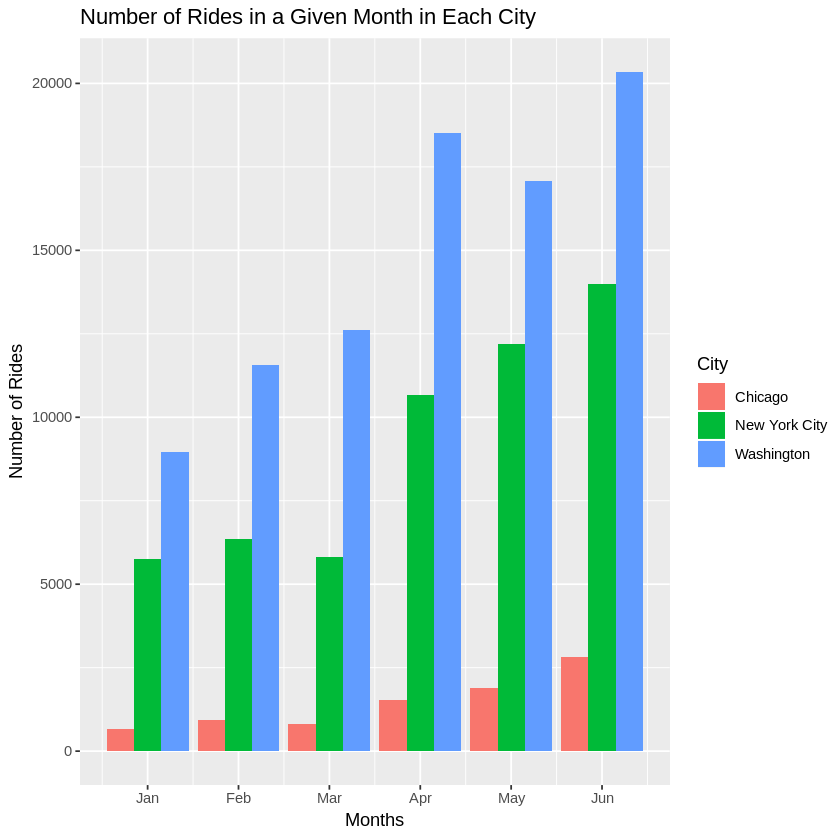

In [43]:
# Visualizing data with ggplot
ggplot(aes(x = Month, fill = City), data = df) +
    geom_bar(position = 'dodge') +
    scale_x_continuous(breaks = c(1,2,3,4,5,6), labels = c('Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun')) +
    ggtitle('Number of Rides in a Given Month in Each City') +
    labs(y = 'Number of Rides', x = 'Months')

### Question 1 Summary
These numbers aren't particularly surprising given the average climate of each respective city in each of these months. Chicago in particular tends to be pretty cold in the early months, so it would naturally be much lower than the others. We also must account that bike sharing in general may be more prevalent in some areas than it is in others, which might account for why Washington tends to have a higher number of general rentals than NYC across all months. In all cases, the number of rentals tends to increase from month to month, likely as weather continues to warm up.

## Question 2: What is the gender distribution of male / female riders in each city?

In [44]:
# Creating new df2 by binding NY and Chicago data while omitting Washington data (due to lack fo info)
df2 <- rbind(chi, ny)

In [45]:
# Viewing values in gender field
sort(table(df2$Gender))


       Female   Male 
  7158  13882  42360 

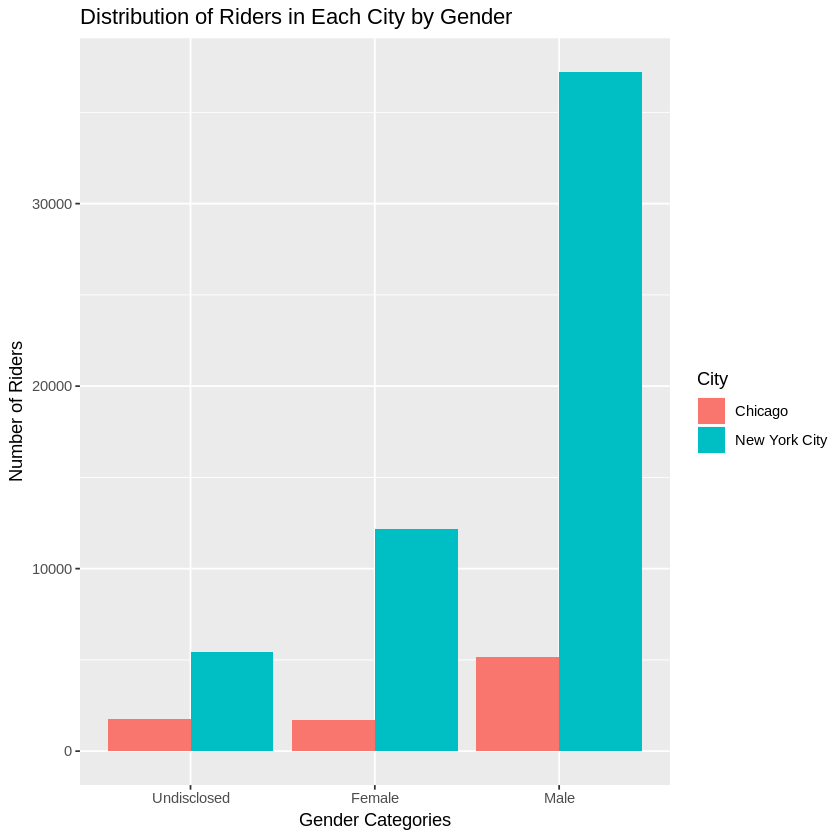

In [47]:
# Visualizing data with ggplot
ggplot(aes(x = Gender, fill = City), data = df2) +
    geom_bar(position = 'dodge') +
    ggtitle('Distribution of Riders in Each City by Gender') +
    scale_x_discrete(labels = c('Undisclosed', 'Female', 'Male')) +
    labs(y = 'Number of Riders', x = 'Gender Categories')

## Summary:
We started off this question by omitting the data from Washington because this particular feature was not present in this dataset. After looking at the data in general between NY and Chicago, it became clear that a number of data points were null and for some reason did not disclose their gender. (We don't have any background on this; it may be that these people are non-traditionally conforming, but in any case, we simply don't have the data.) Across both NY and Washington, it is clear that males tend to rent more bikes than females do by a large magnitude

## Question 3: What is the average travel time for users in different cities?


Warning message:
“Removed 2 rows containing non-finite values (stat_summary).”

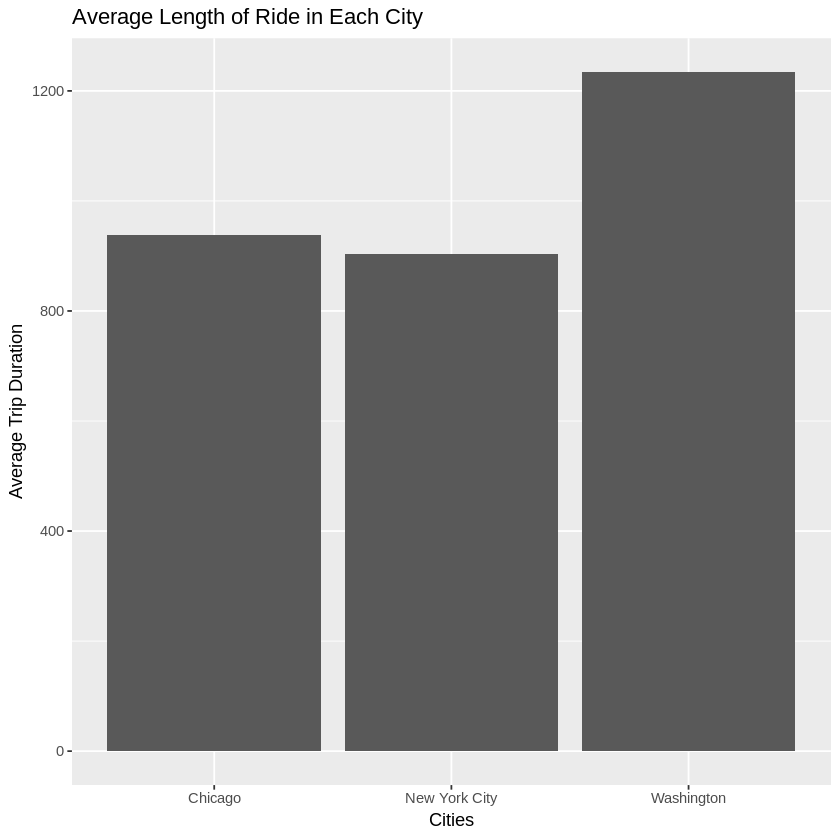

In [48]:
# Visualizing data with ggplot
ggplot(aes(x = City, y = Trip.Duration), data = df) +
    geom_bar(position = 'dodge', stat = "summary", fun.y = "mean") + 
    ggtitle('Average Length of Ride in Each City') +
    labs(y = 'Average Trip Duration', x = 'Cities')

#### Summary of question 3 results goes here.
Interestingly, this is the one case where the three cities finally start to converge a little bit on statistics. Up until now, it's been clear that there were many more rides in Washington as compared to the other cities. In this final question, we are able to see that the average ride duration in all three cities is more or less the same. I'm not familiar with the geographies of NYC nor Washington, so I can't quite articulate the discrepancy here. Washington still does lead the pack here, but Chicago and NYC are right in line with one another.

In [27]:
system('python -m nbconvert Explore_bikeshare_data.ipynb')